# CNN Chess pieces Classification

### Realised by :
**- Berrissoul Saad**
</br>
**- Jehbali Youssef**

### Class : DATA-INE2

## I - Preparing images 

### Import Libraries :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [ ]:
import itertools
import os
import shutil
from PIL import Image

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 1 - Split Data into train-test-valid :

In [ ]:
import zipfile
with zipfile.ZipFile("ChessDataset.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/Chessman-image-dataset/Chess")

In [ ]:
dirs = os.listdir()
print('list of directories :\n',dirs)

list of directories :
 ['Queen', 'Pawn', 'Knight', 'Bishop', 'King', 'Rook']


In [ ]:
classes = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [ ]:
# Number of instances per class
occ = []
for d in classes:
    os.chdir(d)
    occ.append([d,len(os.listdir())])
    os.chdir('..')
occ = pd.DataFrame(occ, columns=['class_name','number'])
occ = occ.sort_values('number', ascending=False)
occ

,class_name,number
3,Pawn,107
2,Knight,106
5,Rook,102
0,Bishop,87
4,Queen,78
1,King,76


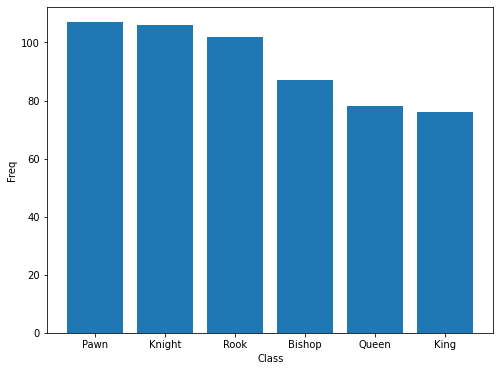

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(occ.class_name, occ.number)
plt.xlabel('Class')
plt.ylabel('Freq')
plt.show()

In [ ]:
# Create directories for train and validation sets
for d in dirs:
  os.makedirs('train/'+d)
  os.makedirs('valid/'+d)

In [ ]:
# Fill those repositories
for d in dirs:
    os.chdir(d)
    for image in os.listdir()[:20]:
        shutil.copy(image, '../valid/'+d)
    for image in os.listdir()[20:]:
        shutil.copy(image, '../train/'+d)
    os.chdir('..')

In [ ]:
os.listdir()

['valid', 'Queen', 'train', 'Pawn', 'Knight', 'Bishop', 'King', 'Rook']

In [ ]:
train_path = 'train'
valid_path = 'valid'

In [ ]:
# We will normalize images size to 40x40
img_size = 40

In [ ]:
# Create batches
train_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(directory = train_path, target_size=(img_size,img_size), classes=classes, color_mode='grayscale',batch_size=10)
valid_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(directory = valid_path, target_size=(img_size,img_size), classes=classes, color_mode='grayscale', batch_size=10)

Found 432 images belonging to 6 classes.
Found 119 images belonging to 6 classes.


### 2 - Visualisations :

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2,5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

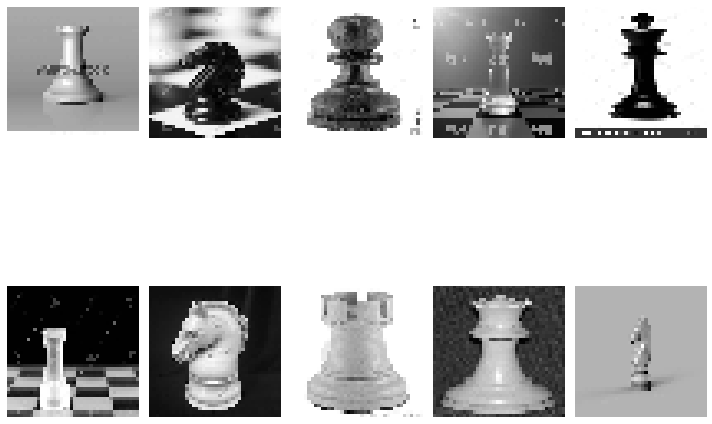

Labels :
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
imgs, labels = next(valid_batches)
plotImages(imgs)
print('Labels :')
print(labels)

## II - Construct the model :

In [ ]:
# Convolutional layer
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='same',input_shape=[img_size, img_size,1]))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D(2))

In [ ]:
# Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
# Compile the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callbacks list with Early Stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stop]

In [ ]:
# Fit the model
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, callbacks = callbacks_list ,verbose=1)

Epoch 1/20
44/44 [==============================] - 20s 340ms/step - loss: 1.7915 - accuracy: 0.1921 - val_loss: 1.7957 - val_accuracy: 0.1681
Epoch 2/20
44/44 [==============================] - 8s 180ms/step - loss: 1.7817 - accuracy: 0.1759 - val_loss: 1.8464 - val_accuracy: 0.1597
Epoch 3/20
44/44 [==============================] - 8s 170ms/step - loss: 1.7798 - accuracy: 0.1944 - val_loss: 1.7981 - val_accuracy: 0.1429
Epoch 4/20
44/44 [==============================] - 8s 179ms/step - loss: 1.7667 - accuracy: 0.2245 - val_loss: 1.7847 - val_accuracy: 0.1261
Epoch 5/20
44/44 [==============================] - 8s 182ms/step - loss: 1.7275 - accuracy: 0.2431 - val_loss: 1.7658 - val_accuracy: 0.1933
Epoch 6/20
44/44 [==============================] - 8s 181ms/step - loss: 1.6344 - accuracy: 0.3241 - val_loss: 1.7065 - val_accuracy: 0.2941
Epoch 7/20
44/44 [==============================] - 8s 179ms/step - loss: 1.6024 - accuracy: 0.3634 - val_loss: 1.6655 - val_accuracy: 0.3361
Epoch

### Evaluate the model :

In [ ]:
acc = model.evaluate(valid_batches)[1]
print('Accuracy on validation set :',round(acc*100,2),'%')

12/12 [==============================] - 1s 125ms/step - loss: 1.5767 - accuracy: 0.4454
Accuracy on validation set : 44.54 %


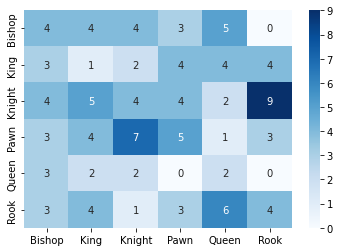

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(valid_batches), axis=-1)
conf = confusion_matrix(y_pred,valid_batches.labels)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=classes, xticklabels=classes)
plt.show()

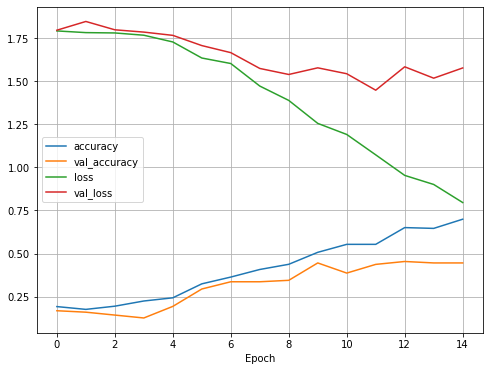

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')

plt.legend()
plt.grid(True)

plt.show()

## III - Make predictions :

In [ ]:
# Save the model
#model.save('/content/sample_data/Chess_Model')
#shutil.make_archive('Chess_Model', 'zip', '/content/sample_data/Chess_Model')

### Load The Model & Make some Predictions :

In [ ]:
def make_prediction(model, path_image, true_label):
  # Load the image
  image_open = open(path_image, 'rb')
  read_image = image_open.read()
  # Decode the image
  image_decode = tf.image.decode_jpeg(read_image, channels=1)
  # Resize the image
  resize_image = tf.image.resize(image_decode, [img_size, img_size])/255.0
  img = np.array(resize_image).reshape(img_size,img_size)
  # Plot the image
  plt.imshow(img, cmap='gray')
  plt.title(true_label)
  plt.axis('off')
  plt.show()
  # Reshape the image for the model input
  img = img.reshape(1,img_size,img_size,1)
  # Make Prediction
  arg_pred = np.argmax(my_model.predict(img))
  pred = classes[arg_pred]
  print("The predicted class of the image :",pred)
  print('-'*30)
  if pred == true_label:
    print('The model has made a good prediction.')
  else:
    print("The model didn't perform well on this image." )


In [ ]:
# Load the Model
#my_model = keras.models.load_model("/content/sample_data/Chess_Model")
my_model = model

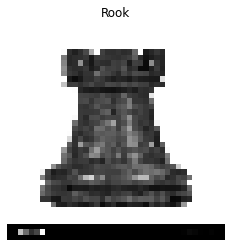

The predicted class of the image : Rook
------------------------------
The model has made a good prediction.


In [ ]:
make_prediction(my_model, '/content/rook.jpg', 'Rook')

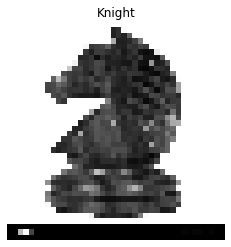

The predicted class of the image : Knight
------------------------------
The model has made a good prediction.


In [ ]:
make_prediction(my_model, '/content/knight.jpg', 'Knight')

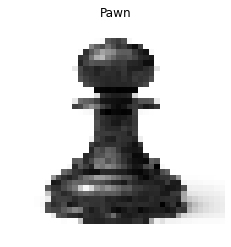

The predicted class of the image : Pawn
------------------------------
The model has made a good prediction.


In [ ]:
make_prediction(my_model, '/content/pawn2.jpg', 'Pawn')

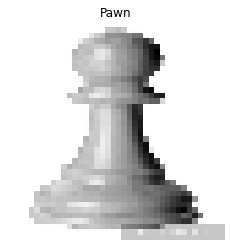

The predicted class of the image : Pawn
------------------------------
The model has made a good prediction.


In [ ]:
make_prediction(my_model, '/content/pawn3.jpg', 'Pawn')

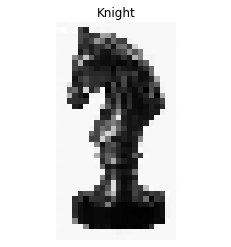

The predicted class of the image : Knight
------------------------------
The model has made a good prediction.


In [ ]:
make_prediction(my_model, '/content/knight2.jpg', 'Knight')

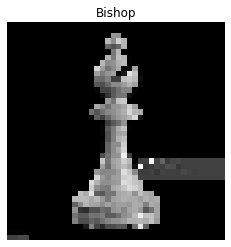

The predicted class of the image : Bishop
------------------------------
The model has made a good prediction.


In [ ]:
make_prediction(my_model, '/content/bishop.jpg', 'Bishop')

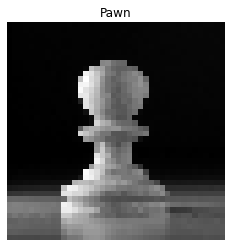

The predicted class of the image : Rook
------------------------------
The model didn't perform well on this image.


In [ ]:
make_prediction(my_model, '/content/pawn.jpeg', 'Pawn')